# Лабораторная работа №2

ФИО: Клюшова Полина Алексеевна  
Группа: БИВТ-22-СП-3

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №6 в семестре (Занятие №2 очное)

Что необходимо сделать:  
**В общих чертах просто провести EDA** (но обычно это не бывает просто)
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/1k2MYXEp_OVQrink_XRC1PwoM0ZuNMeNz4VTWY7cI3hE/edit?usp=sharing) необходимо узнать название своего датасета
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. **Найти** в таблице (из исходных данных) название своего датасета
2. **Описать** кратко постановку задачи, что от вас хотят. Какие есть переменные. Целевое событие непрерывно (предсказываем число от -$\infty$ до $\infty$) либо дискретно (предсказываем класс из конечного множества вариантов, например 0 или 1, или какое-то число в диапазоне [0; 10])
3. Построить распределение целевой переменной в виде гистограммы, сделать промежуточные выводы (обратите внимание на однородоность распределения и возможный дисбаланс). Посчитайте количество уникальных значений целевой переменной.
4. Выведите основные статистики по переменным в датасете (для этого есть готовый метод в pandas, он считает count, min, max, mean, 25%, 50% и пр.). Это делается **одним** методом (вы его знаете).
5. Выведите основную информацию по датасету (сколько всего колонок, каких они типов, сколько в них non-null элементов). Это делается **одним** методом (вы его знаете).
6. Посчитайте количество пропусков (NaN, Null, null, None) элементов во всех колонках. Предположите, почему эти пропуски могли возникнуть, и как их можно было бы заменить.
7. Постройте гистограммы 5 любых признаков (из множества `X`, или как оно изначально у нас называется `data.data`). Если видите какое-то смещение, несимметричность и прочее, опишите это словами в ноутбуке.
8. Постройте графики зависимости 5 любых (на ваш выбор) переменных от целевой переменной (если переменных меньше, чем 5, то сделайте столько, сколько получится). Сделайте вывод, можно ли использовать эти переменные для прогнозирования целевой переменной (иначе говоря, есть ли какая-то взаимосвязь между y-переменной и X-переменной)  
9. _extra_ (необязательно). Посмотрите на зависимость двух переменных одновременно от целевой переменной. То есть по оси OX должна быть переменная $X_{n}$, по оси OY -- переменная $X_{k}$. И у вас будет две кривые (два облака точек) в разрезе целевой переменной. Либо вы можете построить похожее для категориальных признаков, но необходимо будет прочитать про heatmap.

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

## 1. Импорт данных
Датасет spotify-2023

In [7]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
url = '/content/drive/My Drive/spotify-2023.csv'
df = pd.read_csv(url, sep=',', encoding='latin-1')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


## 2. Описание постановки задачи

In [3]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

**Цель:**
 предсказать целевую переменную, которая характеризует популярность трека или его востребованность среди слушателей.

**Переменные в датасете:**

Основные атрибуты трека:
track_name
artist(s)_name
artist_count

Дата выхода трека: released_year, released_month, released_day

Информация о нахождении в плейлистах и чартах:
in_spotify_playlists, in_spotify_charts, in_apple_playlists, in_apple_charts, in_deezer_playlists, in_deezer_charts, in_shazam_charts

Количество прослушиваний: streams

Аудиохарактеристики трека: bpm,
key, mode,
danceability_%, valence_%, energy_%, acousticness_%, instrumentalness_%, liveness_%, speechiness_%



**Целевая переменная** - streams (предсказание числа стримов) - является непрерывной числовой переменной, так как ее значения могут меняться от 0 до +беск.

## 3. Распределение целевой переменной

In [11]:
df['streams']

,streams
0,141381703
1,133716286
2,140003974
3,800840817
4,303236322
...,...
948,91473363
949,121871870
950,73513683
951,133895612


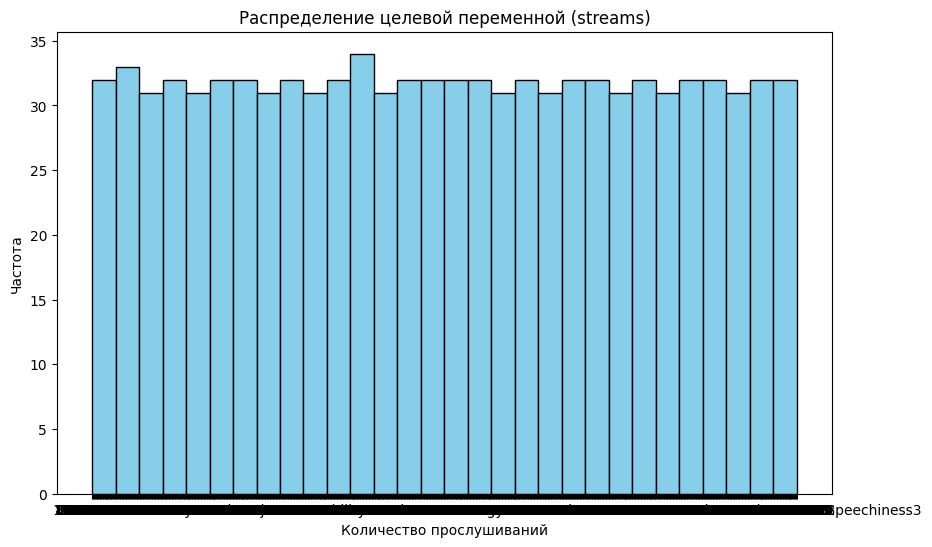

In [10]:
target_column = 'streams'
y = df[target_column]
X = df.drop(columns=[target_column])

plt.figure(figsize=(10, 6))
plt.hist(y, bins=30, color='skyblue', edgecolor='black')
plt.title('Распределение целевой переменной (streams)')
plt.xlabel('Количество прослушиваний')
plt.ylabel('Частота')
plt.show()

<Axes: >

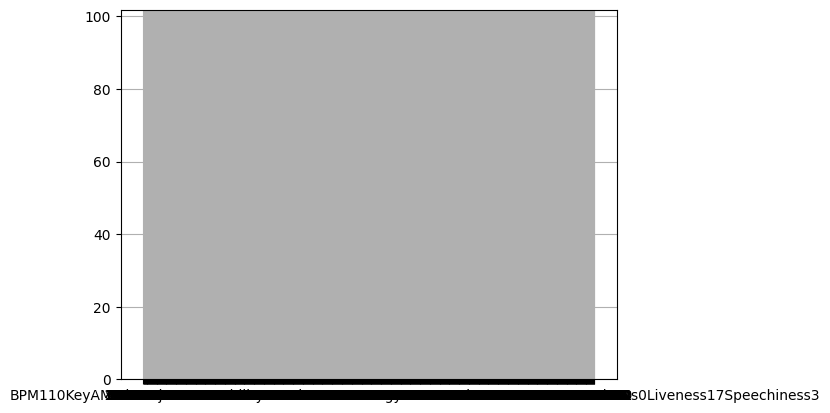

In [5]:
df["streams"].hist()

In [1]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True, bins=30)
plt.title('Распределение целевой переменной')
plt.xlabel('Целевая переменная')
plt.ylabel('Частота')
plt.show()

NameError: name 'sns' is not defined

<Figure size 1000x600 with 0 Axes>